## Clustering: using k-means

In [1]:
#%matplotlib inline
#import matplotlib.pyplot as plt
##import seaborn as sns; sns.set()  # for plot styling
#import numpy as np

In [2]:
#from sklearn.datasets.samples_generator import make_blobs
#X, y_true = make_blobs(n_samples=300, centers=4,
#                       cluster_std=0.60, random_state=0)
#plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=6)
#kmeans.fit(X)
#y_kmeans = kmeans.predict(X)

In [4]:
#plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
#
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

**Afternoon Practice**

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random

### Zahlen 1: eindeutige Cluster

In [272]:
anzahl_cluster=8

x_values = np.random.normal(0,1,2500)
x_2_values = np.random.normal(10,1,2500)
x_values= np.concatenate([x_values,x_2_values])
random.shuffle(x_values)
#x_2_values = np.random.exponential(scale=2,size=5000)

y_values = np.random.normal(5,1,2500)
y_2_values = np.random.normal(15,3,2500)
y_values= np.concatenate([y_values,y_2_values])
random.shuffle(y_values)

z_values = np.random.normal(-5,3,2500)
z_2_values = np.random.normal(-15,1,2500)
z_values= np.concatenate([z_values,z_2_values])
random.shuffle(z_values)

#f_values = x_values+y_values-z_values

#x_3_values = np.random.normal(10,12,1000)
#y_3_values = np.random.normal(10,12,1000)

dataset = pd.DataFrame()
dataset['x'] = x_values
dataset['y'] = y_values
dataset['z'] = z_values
#dataset['f'] = f_values
#dataset.head(50)


In [279]:
dataset

,x,y,z,KMcluster_nr
0,0.551138,4.711230,-7.690496,1
1,1.260262,16.048713,-14.886771,4
2,1.183342,4.873623,-12.790003,5
3,11.189284,4.333744,-15.869793,2
4,-0.494832,20.837996,-5.401938,7
5,0.186650,14.961948,-14.698496,4
6,-0.819599,17.643129,-5.338770,7
7,0.758382,3.951270,-15.071378,5
8,10.522307,4.865831,-15.118834,2
9,9.497867,5.942618,-12.193273,2


### Zahlen 2: enger zusammen

In [288]:
x_values = np.random.normal(0,1,2500)
x_2_values = np.random.normal(3,1,2500)
x_values= np.concatenate([x_values,x_2_values])
random.shuffle(x_values)
#x_2_values = np.random.exponential(scale=2,size=5000)

y_values = np.random.normal(5,1,2500)
y_2_values = np.random.normal(8,1,2500)
y_values= np.concatenate([y_values,y_2_values])
random.shuffle(y_values)

z_values = np.random.normal(-5,1,2500)
z_2_values = np.random.normal(-3,1,2500)
z_values= np.concatenate([z_values,z_2_values])
random.shuffle(z_values)

#f_values = x_values+y_values-z_values

#x_3_values = np.random.normal(10,12,1000)
#y_3_values = np.random.normal(10,12,1000)

dataset = pd.DataFrame()
dataset['x'] = x_values
dataset['y'] = y_values
dataset['z'] = z_values
#dataset['f'] = f_values
#dataset.head(50)

### K_Means Clustering

In [289]:
kmeans = KMeans(n_clusters=anzahl_cluster,random_state=0).fit(dataset.iloc[:,:3])
dataset['KMcluster_nr'] = kmeans.predict(dataset.iloc[:,:3])


In [274]:
np.corrcoef(a,b)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

### GMM-Clustering

In [299]:
from sklearn.mixture import GaussianMixture
matrix = np.zeros((5000,3))
matrix[:,0] = dataset.iloc[:,0].values
matrix[:,1] = dataset.iloc[:,1].values
matrix[:,2] = dataset.iloc[:,2].values
gmm = GaussianMixture(n_components=anzahl_cluster).fit(matrix)
dataset['GMM_cluster_nr'] = labels = gmm.predict(matrix)

In [281]:
matrix

array([[  0.55113791,   4.7112304 ,  -7.69049631],
       [  1.26026213,  16.04871299, -14.88677066],
       [  1.18334231,   4.87362308, -12.7900026 ],
       ...,
       [  9.42765631,   3.68049645,  -5.30405008],
       [ -1.70996919,  14.03247303,  -7.76234183],
       [  9.5475325 ,  11.74906477,  -7.14117131]])

# Plot

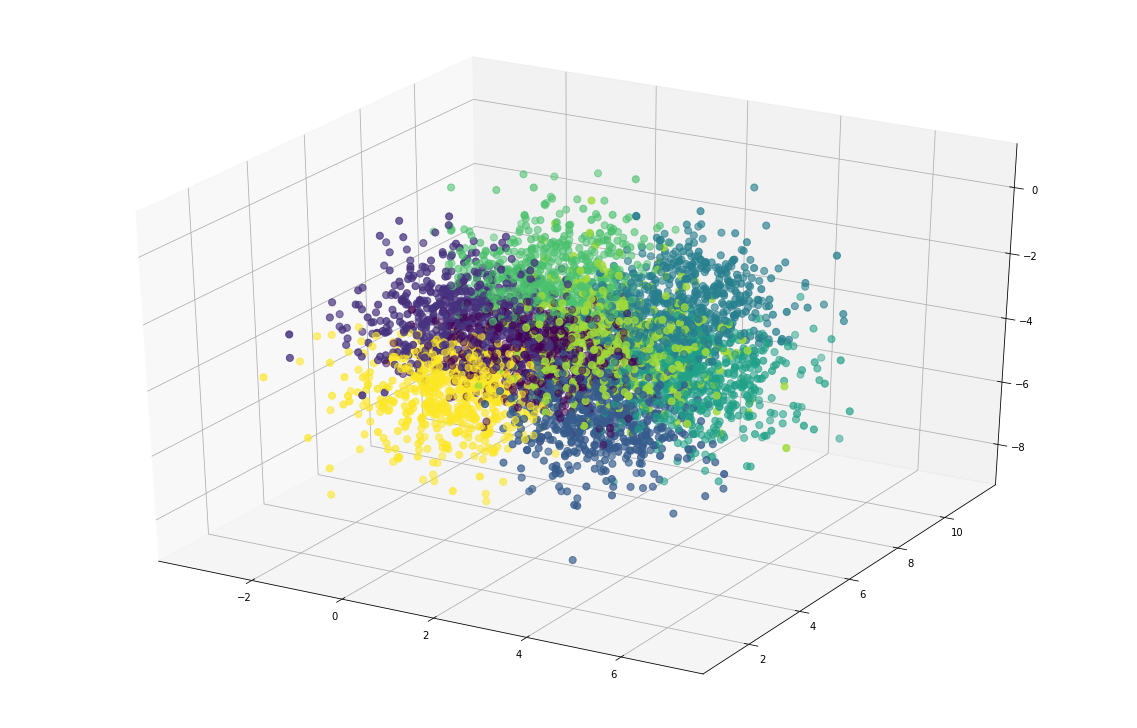

In [292]:
from mpl_toolkits.mplot3d import Axes3D
#plt.figure(1,figsize=(20,20))
#plt.scatter(dataset['x'] ,dataset['y'], dataset['z'])
#plt.scatter(dataset['y'] ,dataset['f'])
#plt.scatter(dataset['z'] ,dataset['f'])

fig = plt.figure(figsize=(20,13))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset.iloc[:5000,0], dataset.iloc[:5000,1], dataset.iloc[:5000,2], c=dataset.iloc[:,4], s=50)
plt.show();

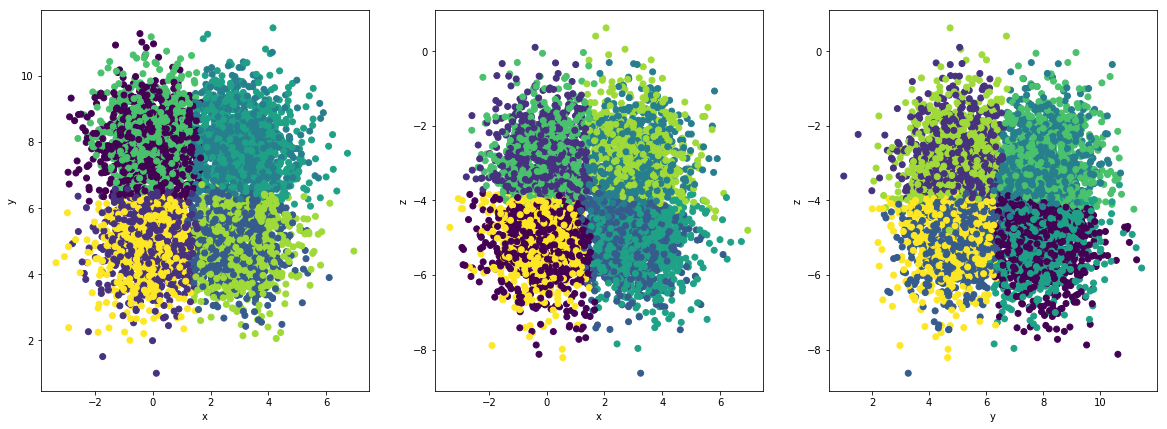

In [295]:
plt.figure(figsize=(20,7))
plt.subplot(131)
plt.scatter(dataset['x'] ,dataset['y'],c=dataset.iloc[:,4])
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(132)
plt.scatter(dataset['x'] ,dataset['z'],c=dataset.iloc[:,4])
plt.xlabel('x')
plt.ylabel('z')

plt.subplot(133)
plt.scatter(dataset['y'] ,dataset['z'],c=dataset.iloc[:,4])
plt.xlabel('y')
plt.ylabel('z')

plt.show();



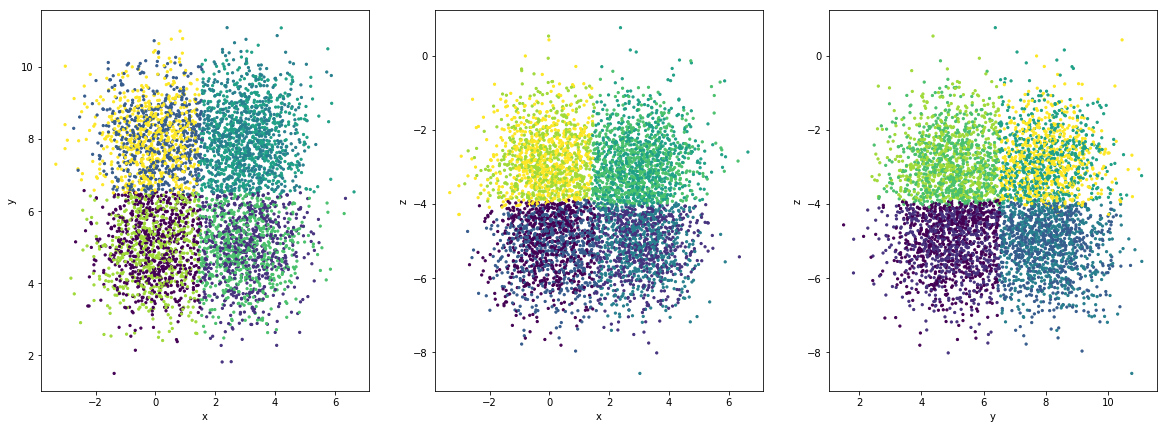

In [148]:
#Plot using scatter
#plt.figure(figsize=(8,8)) 
plt.figure(1,figsize=(20,7))
plt.subplot(131)
plt.scatter(dataset['x'],dataset['y'], c=dataset.iloc[:,3], s=5)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(132)
plt.scatter(dataset['x'],dataset['z'], c=dataset.iloc[:,3], s=5)
plt.xlabel('x')
plt.ylabel('z')

plt.subplot(133)
plt.scatter(dataset['y'],dataset['z'], c=dataset.iloc[:,3], s=5)
plt.xlabel('y')
plt.ylabel('z')
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5);

plt.show();

### Vergleich der Ergebnisse

In [296]:
dataset

,x,y,z,KMcluster_nr,GMM_cluster_nr
0,2.518610,8.339802,-1.993356,0,3
1,3.062086,2.478483,-4.190206,1,6
2,1.058435,7.312727,-2.087101,2,5
3,0.082561,8.235332,-6.478483,7,0
4,0.413236,9.465066,-1.006504,2,5
5,3.681523,6.811525,-2.769536,0,3
6,-0.340008,10.062257,-3.189975,2,5
7,1.083739,4.922370,-2.609665,5,1
8,2.569452,5.785601,-3.221709,4,6
9,2.868364,9.181038,-3.189766,0,3


In [267]:
t = np.array
for i in range(0,anzahl_cluster):
    for j in range(0,anzahl_cluster):
        t = np.append([t],[len(dataset.iloc[:,3][dataset.iloc[:,3] == i]) == (dataset.iloc[:,4][dataset.iloc[:,4] == j])])
print(t)     
    
    

[<built-in function array> False False ... False False False]


In [270]:
t

array([<built-in function array>, False, False, ..., False, False, False],
      dtype=object)

In [269]:
[len(dataset.iloc[:,3][dataset.iloc[:,3] == i]) == (dataset.iloc[:,4][dataset.iloc[:,4] == j])]

[4       False
 6       False
 35      False
 40      False
 81      False
 83      False
 85      False
 88      False
 90      False
 98      False
 100     False
 102     False
 108     False
 113     False
 119     False
 121     False
 126     False
 132     False
 136     False
 138     False
 142     False
 148     False
 157     False
 162     False
 163     False
 187     False
 190     False
 198     False
 207     False
 209     False
         ...  
 4728    False
 4733    False
 4735    False
 4747    False
 4749    False
 4797    False
 4799    False
 4807    False
 4810    False
 4816    False
 4819    False
 4831    False
 4835    False
 4845    False
 4874    False
 4880    False
 4883    False
 4885    False
 4886    False
 4894    False
 4912    False
 4918    False
 4934    False
 4946    False
 4952    False
 4953    False
 4962    False
 4975    False
 4992    False
 4997    False
 Name: GMM_cluster_nr, Length: 628, dtype: bool]

In [264]:
len(dataset.iloc[:,3][dataset.iloc[:,3] == 2]) == (dataset.iloc[:,4][dataset.iloc[:,4] == 6])

1       False
3       False
8       False
12      False
13      False
27      False
45      False
47      False
50      False
62      False
104     False
106     False
107     False
112     False
123     False
147     False
158     False
166     False
176     False
178     False
182     False
188     False
191     False
193     False
194     False
199     False
201     False
202     False
205     False
208     False
        ...  
4818    False
4821    False
4824    False
4827    False
4838    False
4846    False
4853    False
4857    False
4860    False
4863    False
4864    False
4868    False
4869    False
4871    False
4895    False
4903    False
4907    False
4920    False
4922    False
4941    False
4942    False
4943    False
4944    False
4945    False
4951    False
4970    False
4978    False
4980    False
4982    False
4985    False
Name: GMM_cluster_nr, Length: 646, dtype: bool

In [260]:
dataset

,x,y,z,KMcluster_nr,GMM_cluster_nr
0,-0.070558,18.160995,-15.275882,4,0
1,0.748401,4.442716,-15.539746,2,6
2,9.300171,14.163891,-16.114593,1,4
3,1.571594,4.996132,-16.544319,2,6
4,-0.331002,14.825093,-6.947214,3,7
5,-0.866146,4.864359,-4.886489,7,3
6,1.155983,15.948620,-5.310195,3,7
7,10.448142,4.988744,-9.068229,0,5
8,1.262826,5.407614,-14.742612,2,6
9,9.119390,5.659729,-3.829977,0,5


# - - - - - - - - - - - - - - - - - - - -

In [297]:
a=np.array(x_values)
b=np.array(y_values)
c=np.array(z_values)
#d=np.array(f_values)
corr=np.corrcoef([np.array(x_values),b,c,])
np.round(corr,3)

array([[ 1.   ,  0.009, -0.006],
       [ 0.009,  1.   , -0.017],
       [-0.006, -0.017,  1.   ]])

In [298]:
sum(corr[2,0:2]**2)

0.00031781614399145527

In [243]:
t = np.zeros(anzahl_cluster**2)
len(dataset.iloc[:,3][dataset.iloc[:,3] == i])
t.reshape(anzahl_cluster, anzahl_cluster)


array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [34]:
a = array([1,2,3,4,6,7,8,9])
>>> b = array([2,4,6,8,10,12,13,15])
>>> c = array([-1,-2,-2,-3,-4,-6,-7,-8])
>>> corrcoef([a,b,c])

#(x_values, y_values, z_values, f_values)

NameError: name 'array' is not defined

In [37]:
dataset.iloc[:,3]

0       0
1       0
2       3
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      3
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      3
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
4970    1
4971    2
4972    2
4973    2
4974    2
4975    2
4976    2
4977    2
4978    2
4979    1
4980    1
4981    1
4982    1
4983    1
4984    2
4985    2
4986    2
4987    2
4988    2
4989    1
4990    2
4991    2
4992    2
4993    1
4994    2
4995    2
4996    1
4997    2
4998    2
4999    2
Name: cluster_nr, Length: 5000, dtype: int32

In [49]:
dataset

,x,y,z,cluster_nr
0,-0.675648,-3.330663,4.985281,0
1,-1.419838,-5.476499,5.898601,0
2,0.985562,-6.904851,4.776585,3
3,1.408178,-5.794159,5.737665,0
4,-0.180025,-2.771218,4.797579,0
5,0.301537,-4.207057,4.196321,0
6,0.558778,-5.734790,3.333280,0
7,0.716573,-5.715601,2.991513,0
8,-0.710018,-4.095755,3.525389,0
9,0.904563,-3.331655,5.955536,0


In [41]:
for i in range(0,4):
    print(len(dataset[dataset['cluster_nr'] == i]))

2265
619
567
1549


In [ ]:
for i in range(0,4):
    description = dataset[dataset['cluster_nr'] == i].describe()
    print(description)

## mit Rauschen

In [67]:
noise = np.random.normal(0,2,5000)


## mit Gewichtungsfaktoren

In [68]:
f_values = x_values+2*y_values-3*z_values

## mit Normierung

In [69]:
x = np.array(dataset.iloc[2:,0:1])
scale_x = (1/(max(x)-min(x)))
float(scale_x)


0.0760642325761301

In [70]:
min(x)*scale_x

array([-0.39366054])

In [71]:
b_x = float((min(x)*scale_x))
print(b_x)

-0.3936605447983615


In [72]:
l = x*scale_x + b_x
print(l)
print(max(l),min(l))

[[-0.26242283]
 [-0.47536616]
 [-0.36416128]
 ...
 [-0.34371767]
 [-0.18883625]
 [ 0.09454529]]
[0.21267891] [-0.78732109]


In [73]:
b_x

-0.3936605447983615